### Predicting Malaria using trasnfer learning method - VGG19

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/Malaria/Train'

test_path = '/content/drive/MyDrive/Datasets/Malaria/Test'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top = False)

In [ ]:
###VGG 19

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

for layers in vgg19.layers:
  layers.trainable = False

In [ ]:
folders = glob(train_path+'/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/Malaria/Train/Uninfected',
 '/content/drive/MyDrive/Datasets/Malaria/Train/Parasite']

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

#Create a model object
model = Model(inputs = vgg19.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
##Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_path

'/content/drive/MyDrive/Datasets/Malaria/Train'

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 434 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', patience=10 )

In [ ]:
model.fit(training_set, validation_data=test_set, epochs=100, callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 7s 447ms/step - loss: 0.9580 - accuracy: 0.5438 - val_loss: 1.3639 - val_accuracy: 0.3881
Epoch 2/100
14/14 [==============================] - 6s 441ms/step - loss: 0.6751 - accuracy: 0.6705 - val_loss: 0.5895 - val_accuracy: 0.6940
Epoch 3/100
14/14 [==============================] - 6s 436ms/step - loss: 0.4783 - accuracy: 0.7765 - val_loss: 0.5001 - val_accuracy: 0.7239
Epoch 4/100
14/14 [==============================] - 6s 439ms/step - loss: 0.3546 - accuracy: 0.8571 - val_loss: 0.5449 - val_accuracy: 0.7313
Epoch 5/100
14/14 [==============================] - 6s 441ms/step - loss: 0.3215 - accuracy: 0.8664 - val_loss: 0.4089 - val_accuracy: 0.7985
Epoch 6/100
14/14 [==============================] - 6s 438ms/step - loss: 0.2768 - accuracy: 0.8917 - val_loss: 0.3922 - val_accuracy: 0.8358
Epoch 7/100
14/14 [==============================] - 6s 441ms/step - loss: 0.2255 - accuracy: 0.9217 - val_loss: 0.4123 - val_accuracy: 0.7985

In [ ]:
loss = pd.DataFrame(model.history.history)

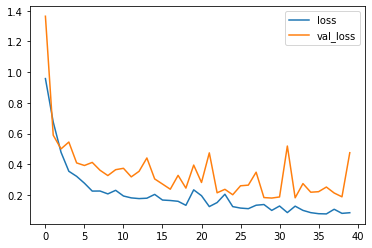

In [ ]:
loss[['loss', 'val_loss']].plot()

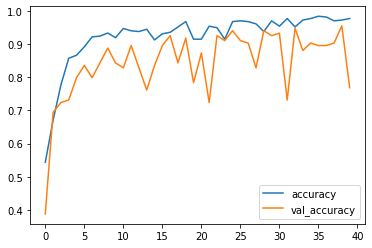

In [ ]:
loss[['accuracy', 'val_accuracy']].plot()

In [ ]:
test_pred = model.predict(test_set)

In [ ]:
predictions = np.argmax(test_pred, axis=1)

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
print(classification_report(test_set.labels, predictions))

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        91
           1       0.27      0.47      0.34        43

    accuracy                           0.43       134
   macro avg       0.44      0.44      0.42       134
weighted avg       0.51      0.43      0.44       134



In [ ]:
def squeeze_excite_block(filters,input):                      
    se = tf.keras.layers.GlobalAveragePooling2D()(input) #(batch size and channel)
    se = tf.keras.layers.Reshape((1, filters))(se) 
    se = tf.keras.layers.Dense(filters//16, activation='relu')(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid')(se)
    se = tf.keras.layers.multiply([input, se])
    return se

In [ ]:
def make_model():
        s = tf.keras.Input(shape=(224, 224, 3)) 
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(s)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)          


        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)


        x = tf.keras.layers.concatenate([tf.keras.layers.GlobalMaxPooling2D()(x),
                                         tf.keras.layers.GlobalAveragePooling2D()(x)])

        x = tf.keras.layers.Dense(2,activation='softmax',use_bias=False,
                                  kernel_regularizer=tf.keras.regularizers.l1(0.00025))(x)
        model = tf.keras.Model(inputs=s, outputs=x)
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        return model

In [ ]:
import tensorflow as tf

In [ ]:
batch_size=32
supermodel=[]
for i in range(5):
        np.random.seed(i)
        model=make_model()                
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(training_set, batch_size=batch_size,shuffle=True,
                    epochs=15,verbose=1)
        model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(training_set , batch_size=batch_size,shuffle=True,
                    epochs=3,verbose=1)
        model.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(training_set, batch_size=batch_size,shuffle=True,
                     epochs=3,verbose=0)
        model.fit(training_set, batch_size=batch_size,shuffle=True, epochs=1,verbose=0)
        supermodel.append(model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
14/14 [==============================] - 11s 502ms/step - loss: 0.4280 - accuracy: 0.8502
Epoch 2/15
14/14 [==============================] - 7s 463ms/step - loss: 0.0906 - accuracy: 0.9747
Epoch 3/15
14/14 [==============================] - 7s 453ms/step - loss: 0.0524 - accuracy: 0.9885
Epoch 4/15
14/14 [==============================] - 7s 452ms/step - loss: 0.0370 - accuracy: 0.9931
Epoch 5/15
14/14 [==============================] - 7s 451ms/step - loss: 0.0567 - accuracy: 0.9839
Epoch 6/15
14/14 [==============================] - 6s 442ms/step - loss: 0.0634 - accuracy: 0.9862
Epoch 7/15
14/14 [==============================] - 7s 451ms/step - loss: 0.0539 - accuracy: 0.9908
Epoch 8/15
14/14 [==============================] - 6s 449ms/step - loss: 0.0373 - accuracy: 0.9954
Epoch 9/15
14/14 [==============================] - 7s 451ms/step - loss: 0.0369 - accuracy: 0.9954
Epoch 10/15
14/14 [==============================] - 7s 455ms/step - loss: 0.0383 - accuracy: 0.990

In [ ]:
pred =np.asarray([a.predict(test_set) for a in supermodel])
predictions = np.argmax(np.mean(pred,axis=0),axis=1)

In [ ]:
print(classification_report(test_set.labels, predictions))

              precision    recall  f1-score   support

           0       0.72      0.23      0.35        91
           1       0.33      0.81      0.47        43

    accuracy                           0.42       134
   macro avg       0.53      0.52      0.41       134
weighted avg       0.60      0.42      0.39       134



### Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception

In [ ]:
xcep = Xception(include_top=False, weights = 'imagenet', input_shape = IMAGE_SIZE + [3])

In [ ]:
xcep.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
for layers in xcep.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(xcep.output)

In [ ]:
prediction = Dense(2, activation = 'softmax')(x)


In [ ]:
model = Model(inputs = xcep.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
 model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(training_set, validation_data=test_set, epochs=100, callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 9s 470ms/step - loss: 0.9398 - accuracy: 0.8641 - val_loss: 0.6359 - val_accuracy: 0.9254
Epoch 2/100
14/14 [==============================] - 6s 422ms/step - loss: 0.7850 - accuracy: 0.9078 - val_loss: 0.6969 - val_accuracy: 0.9328
Epoch 3/100
14/14 [==============================] - 6s 438ms/step - loss: 0.6351 - accuracy: 0.9378 - val_loss: 0.4768 - val_accuracy: 0.9478
Epoch 4/100
14/14 [==============================] - 6s 418ms/step - loss: 0.2537 - accuracy: 0.9654 - val_loss: 0.3768 - val_accuracy: 0.9403
Epoch 5/100
14/14 [==============================] - 6s 415ms/step - loss: 0.1733 - accuracy: 0.9724 - val_loss: 0.1940 - val_accuracy: 0.9478
Epoch 6/100
14/14 [==============================] - 6s 421ms/step - loss: 0.1326 - accuracy: 0.9747 - val_loss: 0.2609 - val_accuracy: 0.9254
Epoch 7/100
14/14 [==============================] - 6s 418ms/step - loss: 0.1745 - accuracy: 0.9677 - val_loss: 0.0981 - val_accuracy: 0.9776

In [ ]:
loss =  pd.DataFrame(model.history.history)

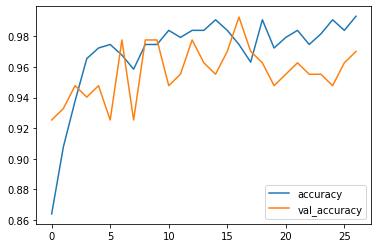

In [ ]:
loss[['accuracy', 'val_accuracy']].plot()

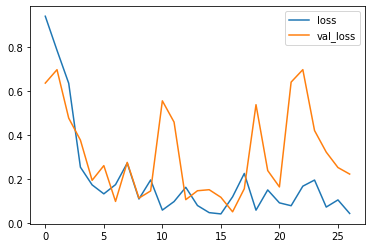

In [ ]:
loss[['loss', 'val_loss']].plot()

In [ ]:
test_pred = model.predict(test_set)

In [ ]:
test_pred

array([[1.00000000e+00, 3.81280632e-19],
       [1.00000000e+00, 1.41600122e-20],
       [1.00000000e+00, 8.32457381e-10],
       [1.00000000e+00, 2.66924735e-37],
       [1.00000000e+00, 0.00000000e+00],
       [2.40541434e-18, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.51408251e-16, 1.00000000e+00],
       [1.00000000e+00, 5.38890243e-37],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.58295022e-23],
       [1.93902142e-02, 9.80609834e-01],
       [1.00000000e+00, 2.47203400e-29],
       [1.00000000e+00, 1.01498828e-23],
       [1.00000000e+00, 9.42234924e-29],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99764383e-01, 2.35589119e-04],
       [1.00000000e+00, 2.12353483e-23],
       [5.54726783e-13, 1.00000000e+00],
       [8.63247915e-05, 9.99913692e-01],
       [4.13049719e-07, 9.99999642e-01],
       [1.00000000e+00, 1.92651050e-26],
       [4.889750

In [ ]:
test_pred_cls = np.argmax(test_pred, axis = 1)

In [ ]:
model.evaluate(test_set)

5/5 [==============================] - 1s 104ms/step - loss: 0.2224 - accuracy: 0.9701


[0.22240526974201202, 0.9701492786407471]

In [ ]:
print(classification_report(test_set.labels, test_pred_cls))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        91
           1       0.40      0.40      0.40        43

    accuracy                           0.61       134
   macro avg       0.55      0.55      0.55       134
weighted avg       0.61      0.61      0.61       134

